#**DATA** **ANALYSIS PYTHON PROJECT - BLINKIT ANALYSIS**

## **import** **Libraries**

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### **Import Raw Data**

In [4]:
df=pd.read_csv("/content/blinkit_data.csv")

### **Sample Data**

In [5]:
df.head()

,Item Fat Content,Item Identifier,Item Type,Outlet Establishment Year,Outlet Identifier,Outlet Location Type,Outlet Size,Outlet Type,Item Visibility,Item Weight,Sales,Rating
0,Regular,FDX32,Fruits and Vegetables,2012,OUT049,Tier 1,Medium,Supermarket Type1,0.100014,15.10,145.4786,5.0
1,Low Fat,NCB42,Health and Hygiene,2022,OUT018,Tier 3,Medium,Supermarket Type2,0.008596,11.80,115.3492,5.0
2,Regular,FDR28,Frozen Foods,2010,OUT046,Tier 1,Small,Supermarket Type1,0.025896,13.85,165.0210,5.0
3,Regular,FDL50,Canned,2000,OUT013,Tier 3,High,Supermarket Type1,0.042278,12.15,126.5046,5.0
4,Low Fat,DRI25,Soft Drinks,2015,OUT045,Tier 2,Small,Supermarket Type1,0.033970,19.60,55.1614,5.0


In [6]:
df.tail()

,Item Fat Content,Item Identifier,Item Type,Outlet Establishment Year,Outlet Identifier,Outlet Location Type,Outlet Size,Outlet Type,Item Visibility,Item Weight,Sales,Rating
8518,low fat,NCT53,Health and Hygiene,1998,OUT027,Tier 3,Medium,Supermarket Type3,0.000000,NaN,164.5526,4.0
8519,low fat,FDN09,Snack Foods,1998,OUT027,Tier 3,Medium,Supermarket Type3,0.034706,NaN,241.6828,4.0
8520,low fat,DRE13,Soft Drinks,1998,OUT027,Tier 3,Medium,Supermarket Type3,0.027571,NaN,86.6198,4.0
8521,reg,FDT50,Dairy,1998,OUT027,Tier 3,Medium,Supermarket Type3,0.107715,NaN,97.8752,4.0
8522,reg,FDM58,Snack Foods,1998,OUT027,Tier 3,Medium,Supermarket Type3,0.000000,NaN,112.2544,4.0


### **Size of Data**

In [7]:
print(f"Size of data : {df.shape}")


Size of data : (8523, 12)


### **Field Info**

In [8]:
df.columns

Index(['Item Fat Content', 'Item Identifier', 'Item Type',
       'Outlet Establishment Year', 'Outlet Identifier',
       'Outlet Location Type', 'Outlet Size', 'Outlet Type', 'Item Visibility',
       'Item Weight', 'Sales', 'Rating'],
      dtype='object')

### **Data Types**

In [9]:
df.dtypes

,0
Item Fat Content,object
Item Identifier,object
Item Type,object
Outlet Establishment Year,int64
Outlet Identifier,object
Outlet Location Type,object
Outlet Size,object
Outlet Type,object
Item Visibility,float64
Item Weight,float64


### **Data Cleaning**

In [10]:
df["Item Fat Content"].unique()

array(['Regular', 'Low Fat', 'low fat', 'LF', 'reg'], dtype=object)

In [11]:
df["Item Fat Content"]=df['Item Fat Content'].replace({'low fat':'Low Fat','LF':'Low Fat','reg':'Regular'})

In [12]:
df["Item Fat Content"].unique()

array(['Regular', 'Low Fat'], dtype=object)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item Fat Content           8523 non-null   object 
 1   Item Identifier            8523 non-null   object 
 2   Item Type                  8523 non-null   object 
 3   Outlet Establishment Year  8523 non-null   int64  
 4   Outlet Identifier          8523 non-null   object 
 5   Outlet Location Type       8523 non-null   object 
 6   Outlet Size                8523 non-null   object 
 7   Outlet Type                8523 non-null   object 
 8   Item Visibility            8523 non-null   float64
 9   Item Weight                7060 non-null   float64
 10  Sales                      8523 non-null   float64
 11  Rating                     8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [14]:
df.isnull().sum()

,0
Item Fat Content,0
Item Identifier,0
Item Type,0
Outlet Establishment Year,0
Outlet Identifier,0
Outlet Location Type,0
Outlet Size,0
Outlet Type,0
Item Visibility,0
Item Weight,1463


In [15]:
df.fillna(df['Item Weight'].mean(),inplace=True)

In [16]:
df.isnull().sum()

,0
Item Fat Content,0
Item Identifier,0
Item Type,0
Outlet Establishment Year,0
Outlet Identifier,0
Outlet Location Type,0
Outlet Size,0
Outlet Type,0
Item Visibility,0
Item Weight,0


In [17]:
df.duplicated().sum()

np.int64(0)

## **BUSINESS REQUIREMENTS**

### **KPI's REQUIREMENTS**

In [18]:
#Total Sales
total_sales=df['Sales'].sum()
print(f"Total Sales are : {total_sales:,.3f}")

Total Sales are : 1,201,681.481


In [19]:
#Average Sales
average_sales=df['Sales'].mean()
print(f"Average Sales are : {average_sales:.3f}")

Average Sales are : 140.993


In [20]:
#No of Items Sold
total_items_sold=df["Sales"].count()
print(f"Total Items Sold are : {total_items_sold}")

Total Items Sold are : 8523


In [21]:
#Average Sales
average_sales=df['Rating'].mean()
print(f"Average Ratings are : {average_sales:.1f}")

Average Ratings are : 4.0


## **CHARTS REQUIREMENTS**



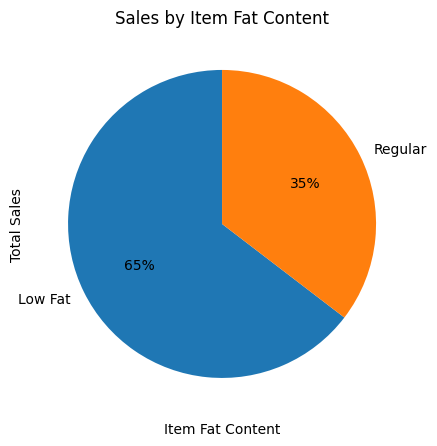

In [22]:
sales_by_fat = df.groupby('Item Fat Content')['Sales'].sum()
plt.figure(figsize=(8, 5))
plt.pie(sales_by_fat,labels=sales_by_fat.index,autopct="%1.0f%%",startangle=90)
plt.title('Sales by Item Fat Content')
plt.xlabel('Item Fat Content')
plt.ylabel('Total Sales')
plt.show()

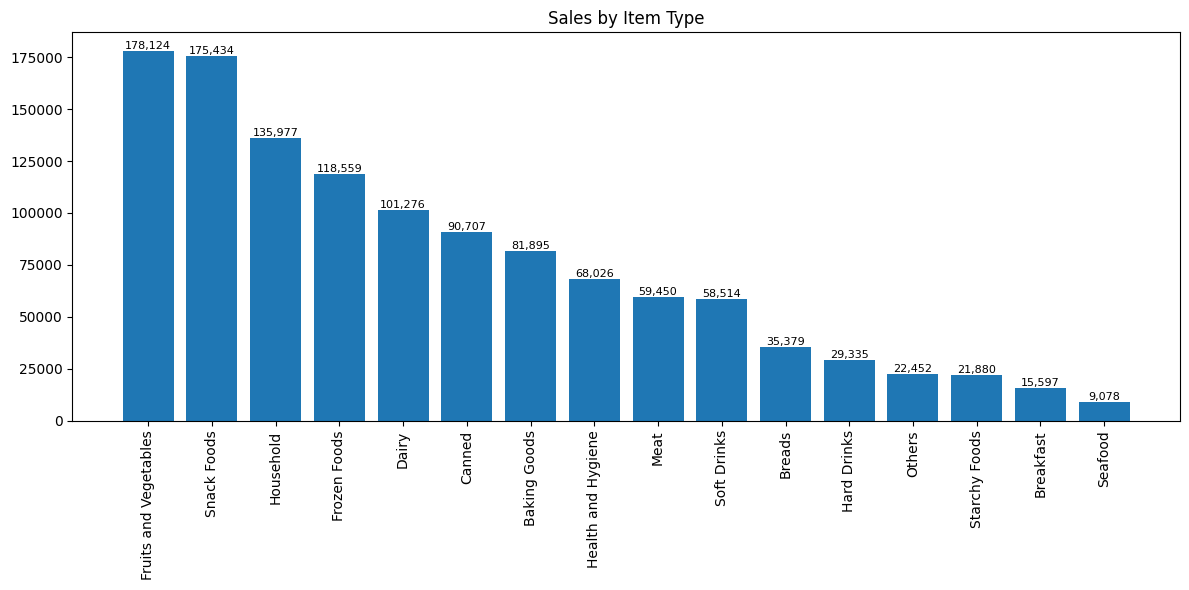

In [23]:
sales_by_item = df.groupby("Item Type")["Sales"].sum().sort_values(ascending=False)
plt.figure(figsize=(12,6))
bar=plt.bar(sales_by_item.index,sales_by_item.values)
plt.xticks(rotation=90)
plt.title("Sales by Item Type")

for rect in bar:
  height=rect.get_height()
  plt.text(rect.get_x()+rect.get_width()/2,height,f"{height:,.0f}",ha="center",va="bottom",fontsize=8)


plt.tight_layout()
plt.show()


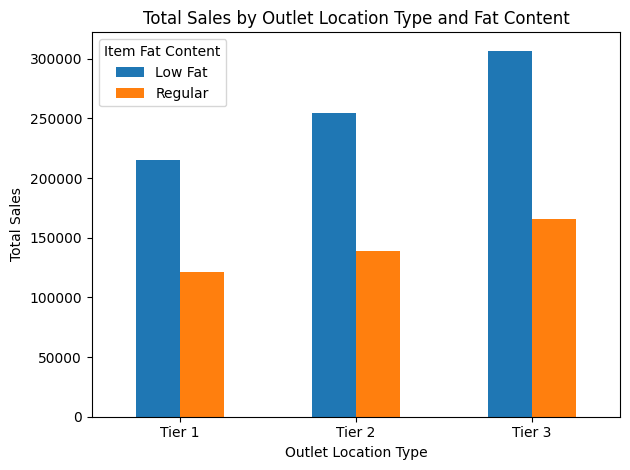

In [24]:
import matplotlib.pyplot as plt
grouped = df.groupby(["Outlet Location Type", "Item Fat Content"])["Sales"].sum().unstack()

grouped.plot(kind="bar")  # Grouped bar plot
plt.title("Total Sales by Outlet Location Type and Fat Content")
plt.ylabel("Total Sales")
plt.xlabel("Outlet Location Type")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


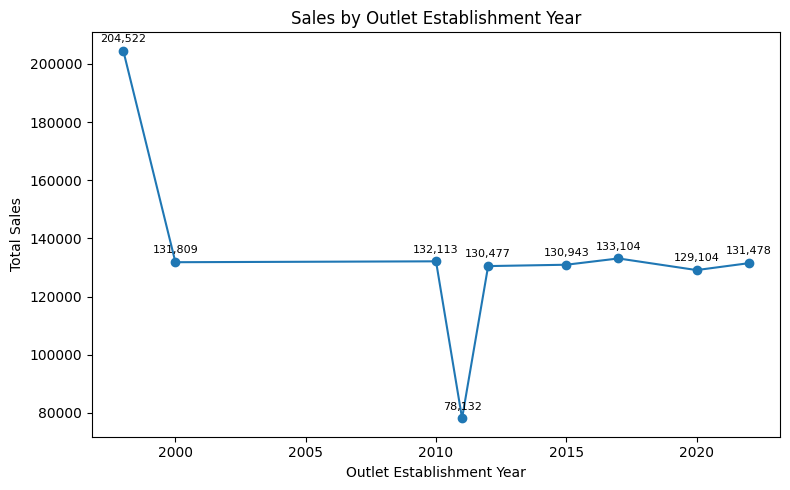

In [25]:
sales_by_establishment=df.groupby("Outlet Establishment Year")["Sales"].sum().sort_index()
plt.figure(figsize=(8,5))
plt.plot(sales_by_establishment.index,sales_by_establishment.values,marker="o",linestyle="-")
plt.title("Sales by Outlet Establishment Year")
plt.xlabel("Outlet Establishment Year")
plt.ylabel("Total Sales")
for x,y in zip(sales_by_establishment.index,sales_by_establishment.values):
  plt.text(x,y+3000,f"{y:,.0f}",ha="center",fontsize=8)
plt.tight_layout()
plt.show()

Text(0, 0.5, 'Total Sales')

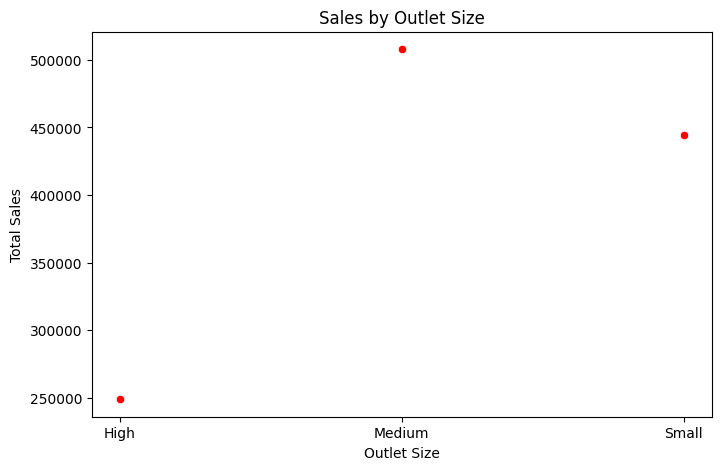

In [26]:
sales_by_outlet=df.groupby("Outlet Size")["Sales"].sum()
plt.figure(figsize=(8,5))
sns.scatterplot(x=sales_by_outlet.index,y=sales_by_outlet.values,color="red")
plt.title("Sales by Outlet Size")
plt.xlabel("Outlet Size")
plt.ylabel("Total Sales")


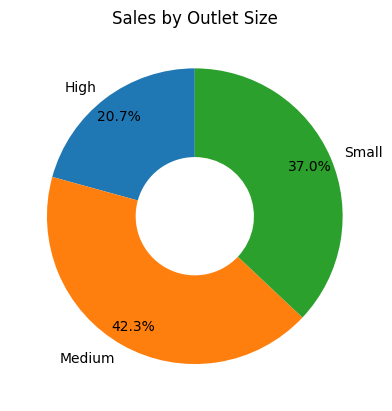

In [27]:
sales_by_outlet = df.groupby("Outlet Size")["Sales"].sum()
plt.title("Sales by Outlet Size")
plt.pie(
    sales_by_outlet,
    labels=sales_by_outlet.index,
    autopct='%1.1f%%',
    startangle=90,
    pctdistance=0.85 ,
    wedgeprops={'width': 0.6}  # This creates the "donut hole"
);

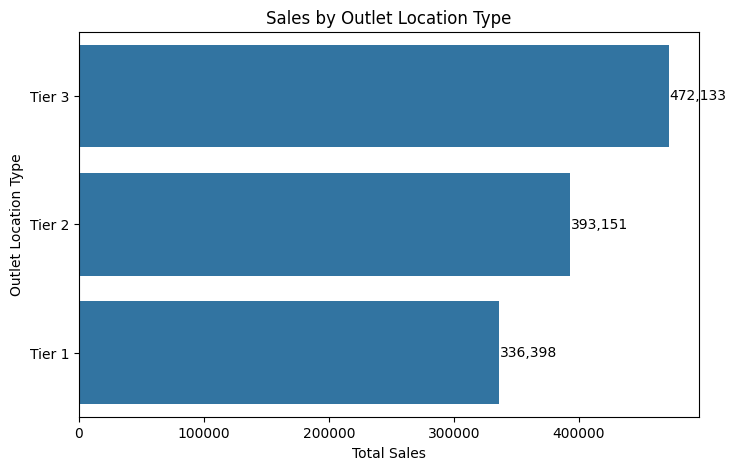

In [28]:
sales_by_location = df.groupby("Outlet Location Type")["Sales"].sum().reset_index()
sales_by_location = sales_by_location.sort_values("Sales", ascending=False)

plt.figure(figsize=(8, 5))
ax = sns.barplot(x="Sales", y="Outlet Location Type", data=sales_by_location)
plt.title("Sales by Outlet Location Type")
plt.xlabel("Total Sales")
plt.ylabel("Outlet Location Type")

# Add text labels on top of each bar
for rect in ax.patches:
    width = rect.get_width()  # Get the width (Sales) of the bar
    plt.text(width, rect.get_y() + rect.get_height() / 2, f"{width:,.0f}", va="center", ha="left")

plt.show()


## **Project Summary**


## 📊 Final Project Insights Summary

**Blinkit Sales Data Analysis – Python**  
Analyzed sales data from a retail dataset using pandas and seaborn, focusing on item-level and outlet-level patterns. Cleaned and standardized categorical values, handled missing values, and created multiple visualizations for business insights.

### ✅ Key Insights:
- **Urban outlets** generated the highest total sales, highlighting urban markets as key drivers.
- **Supermarket Type1** was the top-performing outlet type by revenue.
- Items with **“Low Fat”** labels accounted for the largest portion of sales, reflecting consumer health preferences.
- **Frozen Foods** and **Dairy** were the highest-selling item categories across all outlets.
